# **DATASET 2**





business objective : salary prediction

target variable : salary_in_usd

source :  https://github.com/foorilla

# **Data Understanding**


In [113]:
# Let's import the libraries
import numpy as np # linear algebra
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

from sklearn.metrics import silhouette_score

In [114]:
#Read the dataset
df = pd.read_csv('/content/salaries.csv')

**DATA Overview**

In [115]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [116]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


In [117]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
151440,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
151441,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
151442,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
151443,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
151444,2021,SE,FT,Data Scientist,7000000,INR,94665,IN,50,IN,L


In [118]:
#data shape
print(df.shape)

(151445, 11)


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB


In [120]:
# data decription
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,151445.000000,1.514450e+05,151445.000000,151445.000000
mean,2024.435313,1.628380e+05,157527.458411,20.938625
std,0.671842,2.080124e+05,74150.772377,40.620393
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,105800.000000,0.000000
50%,2025.000000,1.470000e+05,146100.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


The 'describe()' method is useful for understanding the central tendency, dispersion, and other summary statistics of a dataset column.

In [121]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [122]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col} Values:")
    print(df[col].unique())


experience_level Values:
['EX' 'SE' 'MI' 'EN']

employment_type Values:
['FT' 'PT' 'CT' 'FL']

job_title Values:
['Head of Data' 'Data Scientist' 'Engineer' 'AI Product Lead'
 'AI Engineer' 'Business Intelligence Engineer' 'Manager'
 'Computer Vision Engineer' 'Data Management' 'Product Manager'
 'Data Engineer' 'Machine Learning Engineer' 'Software Engineer'
 'Data Analyst' 'Research Scientist' 'Developer' 'Associate'
 'Computational Scientist' 'Analyst' 'AI Scientist' 'DataOps Engineer'
 'Prompt Engineer' 'Data Governance Engineer' 'Analytics Engineer'
 'AI Governance Specialist' 'Backend Engineer' 'DevOps Engineer'
 'Systems Engineer' 'Tech Lead' 'Solutions Engineer' 'Product Analyst'
 'Researcher' 'Executive' 'Director' 'Consultant' 'Solutions Architect'
 'Data Reporting Specialist' 'BI Developer' 'Data Manager'
 'Machine Learning Scientist' 'Data Governance' 'Applied Scientist'
 'Data Architect' 'Statistical Programmer' 'Data Specialist'
 'Technical Architect' 'Cloud Engineer' 'B

🔹 experience_level :

EN : Entry-level / Junior

MI : Mid-level / Intermediate

SE : Senior-level

EX : Executive / Director-level

🔹 employment_type :      

FT :	Full-time

PT :	Part-time

CT :	Contract

FL :	Freelance




In [123]:
df['job_title'].value_counts()

,count
job_title,
Data Scientist,18751
Software Engineer,16948
Data Engineer,16352
Data Analyst,13779
Engineer,11004
...,...
AI Software Development Engineer,1
Quantitative Research Analyst,1
CRM Data Analyst,1


**DATA Cleaning**

In [124]:
df.duplicated().sum()

np.int64(79532)

In [125]:
## Removing the duplicates from the given dataset.
df.drop_duplicates(inplace=True)

In [126]:
#check duplicates droped
df.duplicated().sum()

np.int64(0)

# Data visualization

**Univariate Analysis (Single Feature)**

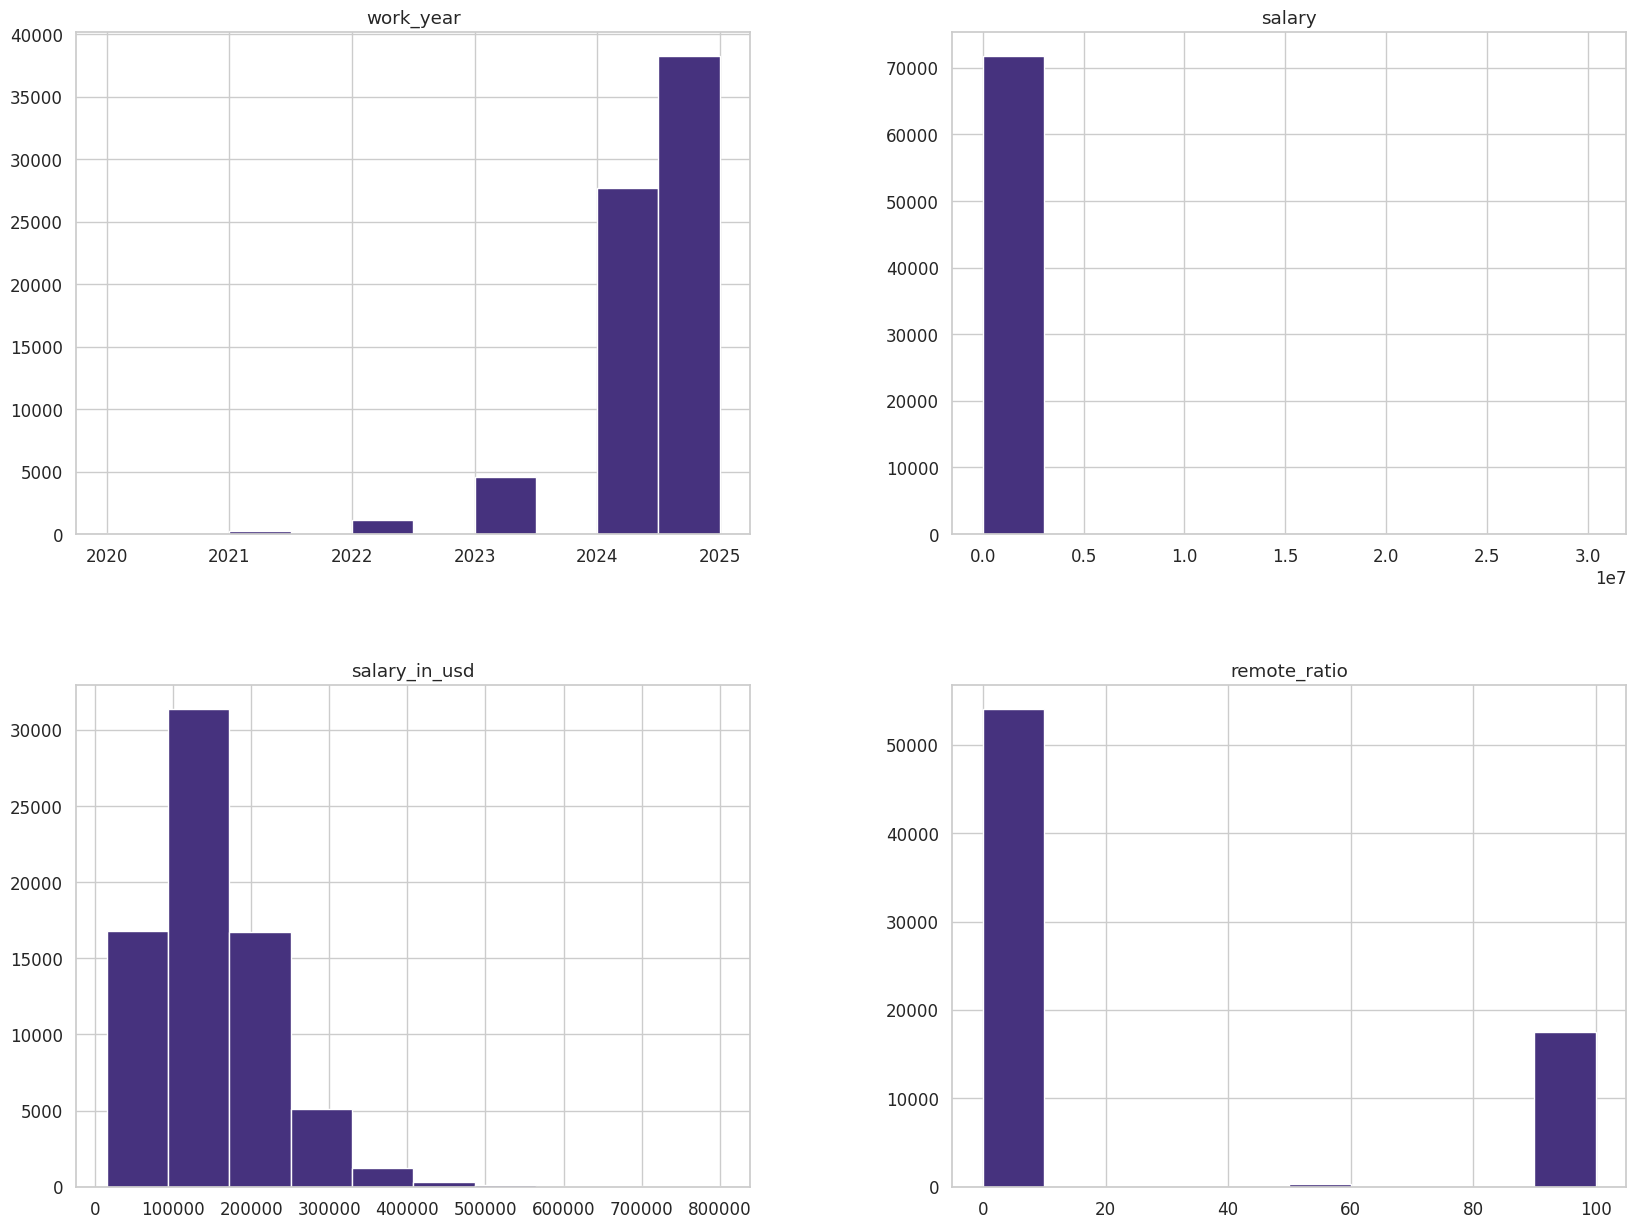

In [127]:
# Displying Histograms
df.hist(figsize=(20,15))
plt.show()

Histograms are used to visualize the distribution of a dataset. You can observe the shape of the distribution, identify peaks or clusters, and get a sense of the spread of the data

**Bivariate Analysis (Feature Relationships)**

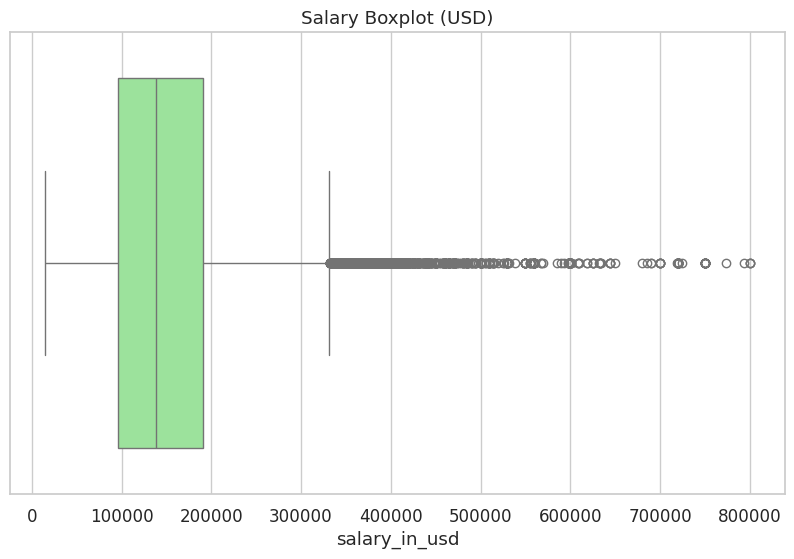

In [128]:
# Display settings
sns.set(style="whitegrid", palette="viridis", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 6)

# Boxplot to detect outliers
sns.boxplot(x=df['salary_in_usd'], color='lightgreen')
plt.title("Salary Boxplot (USD)")
plt.show()

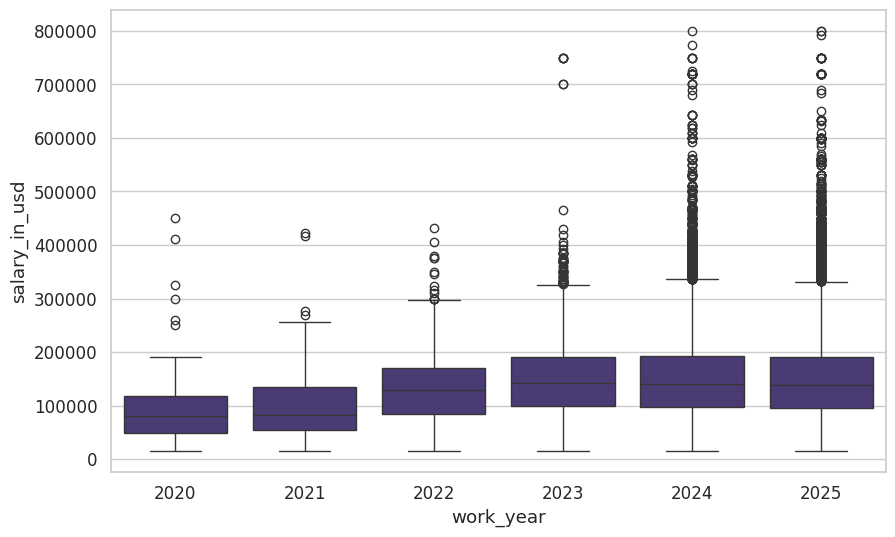

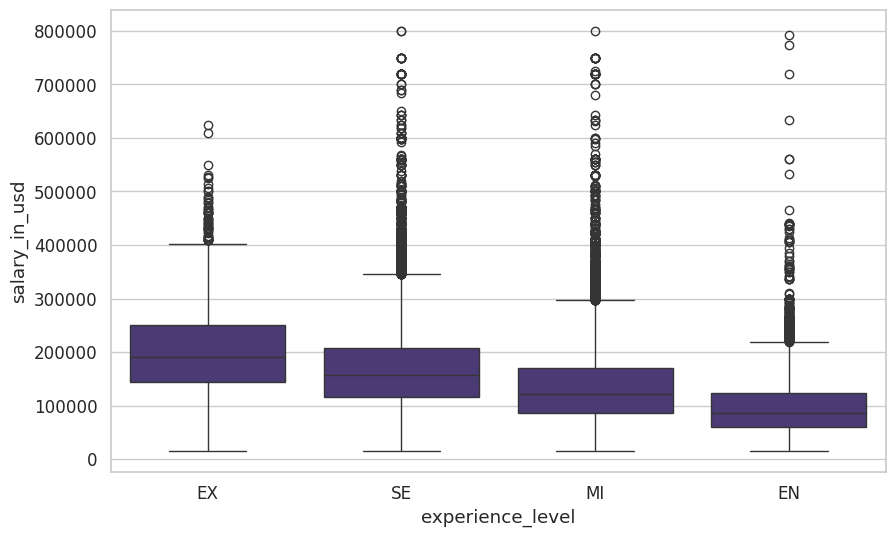

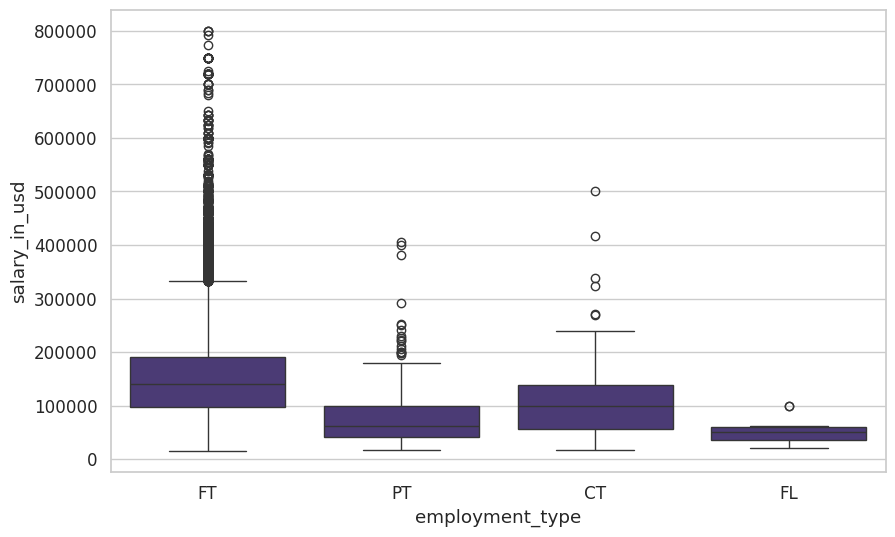

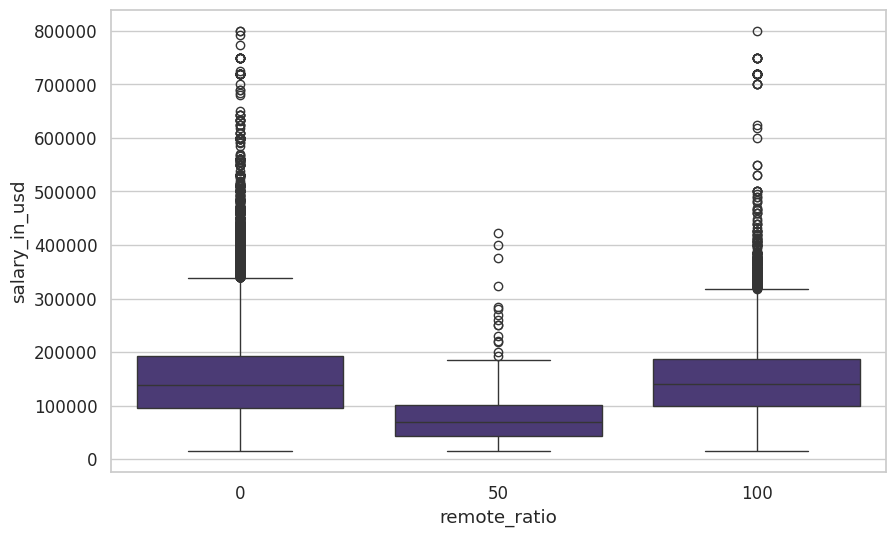

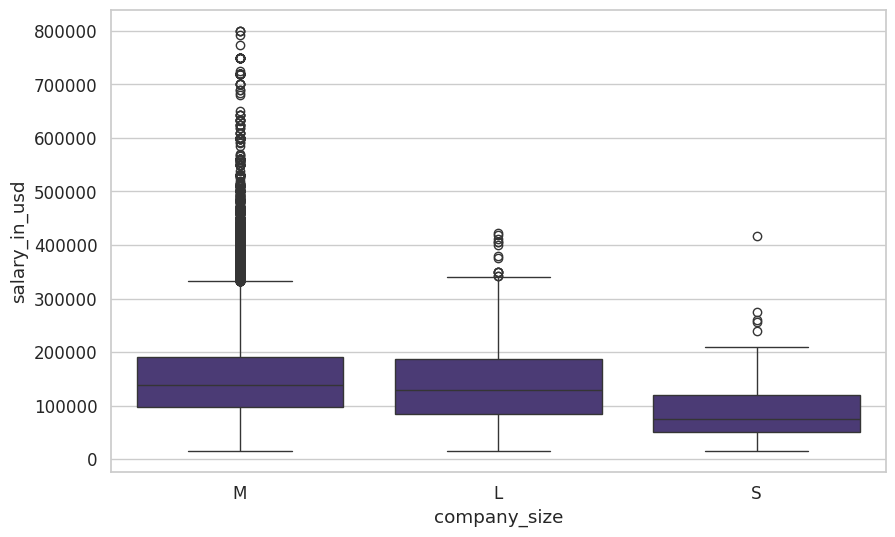

In [129]:

cols = ['work_year','experience_level','employment_type', 'remote_ratio', 'company_size']

for col in cols:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=col, y='salary_in_usd', data=df)



/tmp/ipython-input-3761563458.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipython-input-3761563458.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




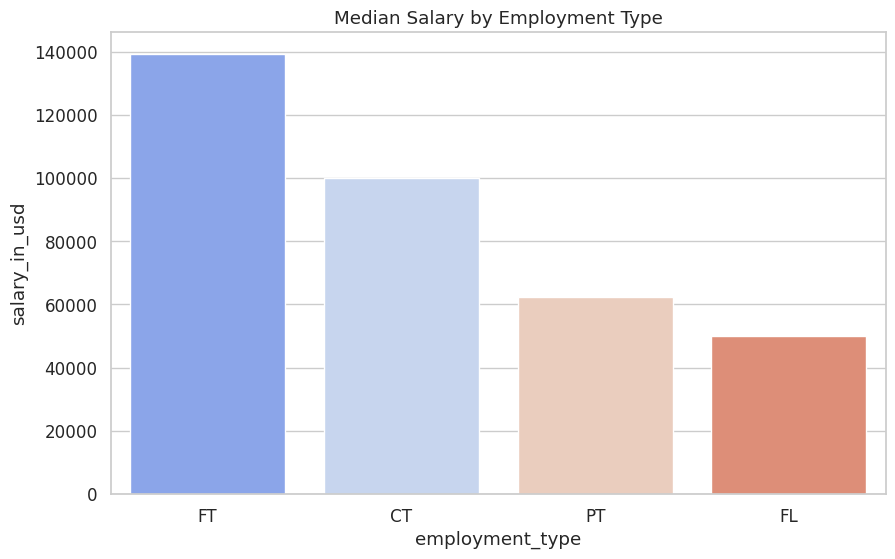

In [130]:
# 7. SALARY BY EMPLOYMENT TYPE
# ====================================================
sns.barplot(
    data=df, x='employment_type', y='salary_in_usd', estimator=np.median,
    palette='coolwarm', ci=None, order=df['employment_type'].value_counts().index
)
plt.title("Median Salary by Employment Type")
plt.show()

/tmp/ipython-input-2541349233.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




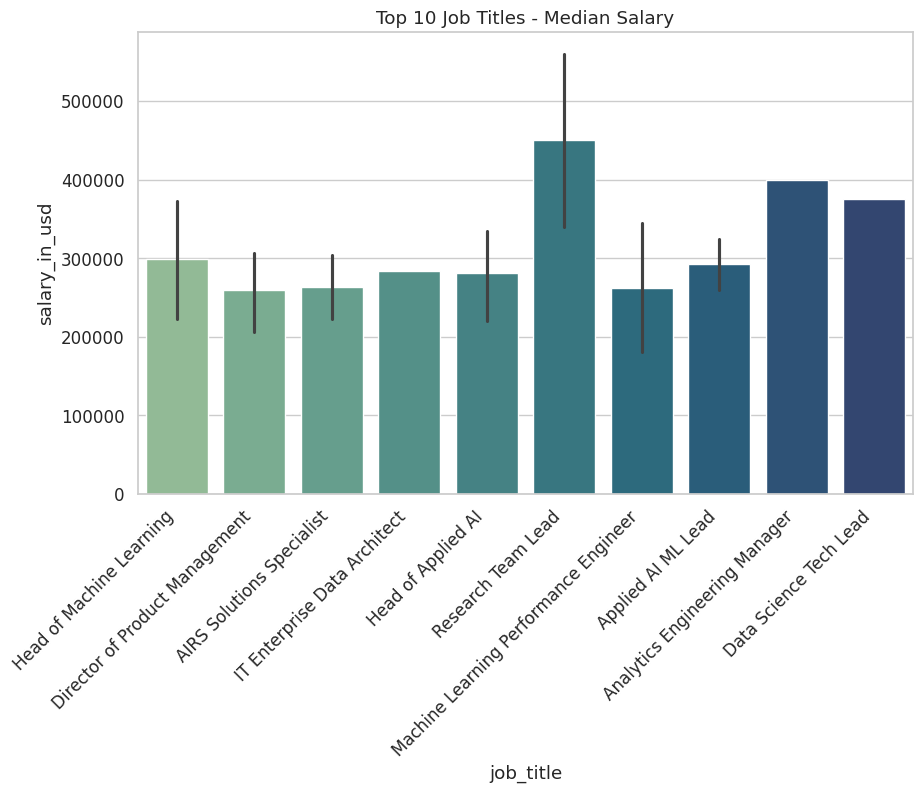

In [131]:
# 10. TOP highest-paying job TITLES

top_jobs = df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False).head(10).index
sns.barplot(
    data=df[df['job_title'].isin(top_jobs)],
    x='job_title', y='salary_in_usd', estimator=np.median, palette='crest'
)
plt.title("Top 10 Job Titles - Median Salary")
plt.xticks(rotation=45, ha='right')
plt.show()

In [132]:
!pip install pycountry

In [133]:
# 12. INTERACTIVE GEO MAP
# ====================================================
import plotly.express as px
import pycountry

# Function to convert ISO-2 to ISO-3
def iso2_to_iso3(iso2_code):
    try:
        return pycountry.countries.get(alpha_2=iso2_code).alpha_3
    except:
        return None

# Aggregate data
country_avg = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Convert ISO-2 to ISO-3
country_avg['iso3'] = country_avg['company_location'].apply(iso2_to_iso3)

# Remove any countries that couldn't be converted
country_avg = country_avg.dropna(subset=['iso3'])

fig = px.choropleth(
    country_avg,
    locations="iso3",
    locationmode="ISO-3",
    color="salary_in_usd",
    hover_name="company_location",
    hover_data={"salary_in_usd": ":,.0f", "iso3": False},
    title="Average Salary by Country (USD)",
    color_continuous_scale="Viridis",
    labels={"salary_in_usd": "Avg Salary (USD)"}
)
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    )
)
fig.show()

# Correlations.

<Axes: >

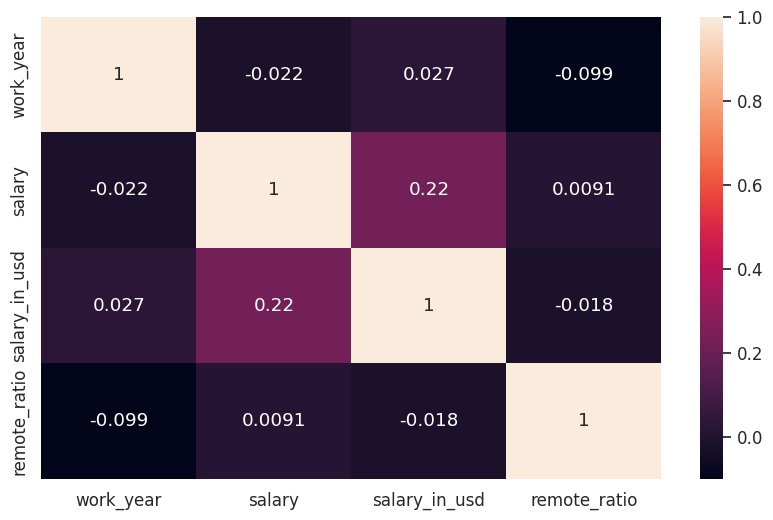

In [134]:
# Display correlation matrix for numerical columns
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)


The values range from -1 to 1, where:

1 indicates a perfect positive correlation,
-1 indicates a perfect negative correlation, and
0 indicates no correlation.

In [135]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score

In [136]:
# Keep top 30 job titles and map others to 'Other'
TOP_N = 30
top_titles = df['job_title'].value_counts().nlargest(TOP_N).index.tolist()


def map_job_title(x):
  return x if x in top_titles else 'Other'


df['job_title_grouped'] = df['job_title'].apply(map_job_title)
print('Unique job_title_grouped:', df['job_title_grouped'].nunique())
print(df['job_title_grouped'].value_counts().head(40))

Unique job_title_grouped: 31
job_title_grouped
Other                             15273
Data Scientist                     7160
Data Engineer                      7071
Data Analyst                       6405
Software Engineer                  4921
Engineer                           4375
Manager                            3612
Machine Learning Engineer          3462
Analyst                            2783
Research Scientist                 1381
Analytics Engineer                 1341
Product Manager                    1326
Associate                          1238
Data Architect                     1231
AI Engineer                        1163
Research Engineer                   887
Consultant                          783
Developer                           715
Data Manager                        697
Data Specialist                     669
Systems Engineer                    563
Applied Scientist                   561
Architect                           543
Business Intelligence Analyst    

# Encoding

In [137]:
# Map experience_level to ordered numeric: EN < MI < SE < EX
exp_map = {'EN':0, 'MI':1, 'SE':2, 'EX':3}
df['experience_level_ord'] = df['experience_level'].map(exp_map)


# Map company_size to ordinal: S < M < L
size_map = {'S':0, 'M':1, 'L':2}
df['company_size_ord'] = df['company_size'].map(size_map)

Maps experience and company size categories to ordered numerical values.
Turns ordinal text data into quantitative form for analysis and clustering.

**Frequency Encoding for High-Cardinality Features**

In [138]:
df.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


In [139]:
numeric_features = ['remote_ratio', 'experience_level_ord', 'company_size_ord']
cat_low_card = ['employment_type', 'job_title_grouped']
high_card_cat = ['employee_residence', 'company_location','salary_currency']

In [140]:

for col in high_card_cat:
  freq = df[col].value_counts(normalize=True)
  df[col + '_freq'] = df[col].map(freq)
prepared_features = numeric_features + cat_low_card + [c + '_freq' for c in high_card_cat]
print('Prepared features sample:', prepared_features)

Prepared features sample: ['remote_ratio', 'experience_level_ord', 'company_size_ord', 'employment_type', 'job_title_grouped', 'employee_residence_freq', 'company_location_freq', 'salary_currency_freq']


One-hot encoding such columns would create hundreds of dummy variables → inefficient and noisy.

Frequency encoding captures importance of a category with fewer dimensions.

In [141]:
from sklearn.preprocessing import FunctionTransformer


numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(transformers=[
('num', numeric_transformer, numeric_features),
('cat', cat_transformer, cat_low_card)
], remainder='passthrough')

In [142]:
df.shape

(71913, 17)

In [143]:
df.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


In [144]:
X_acp = df.drop(columns=['experience_level' , 'employment_type' , 'job_title' ,'salary_currency', 'employee_residence' , 'company_location' ,'company_size' , 'job_title_grouped' ])


Builds a data preprocessing pipeline:

Scales numeric features (mean=0, std=1)

One-hot encodes low-cardinality categorical features

Uses ColumnTransformer to combine them.

In [145]:
X_acp.dtypes

,0
work_year,int64
salary,int64
salary_in_usd,int64
remote_ratio,int64
experience_level_ord,int64
company_size_ord,int64
employee_residence_freq,float64
company_location_freq,float64
salary_currency_freq,float64


In [146]:
# Scale
scaler = StandardScaler()
X_acp_scaled = scaler.fit_transform(X_acp)




In [147]:
target = df['salary_in_usd']
df.drop(columns=['salary_in_usd'], inplace=True)

# ACP

In [148]:
# Initialisation et application de l'ACP
pca = PCA()
pca_components = pca.fit_transform(X_acp_scaled)

calcul composantes principales =>  Chaque composante est une combinaison linéaire des variables initiales

In [149]:
# Calcul des valeurs propres (variance expliquée)
explained_variance = pca.explained_variance_ratio_

# Affichage des variances expliquée
print("Variance expliquée par chaque composante :", explained_variance)

Variance expliquée par chaque composante : [0.30435901 0.1480002  0.12686269 0.11458983 0.09846042 0.09517403
 0.06654423 0.04555438 0.00045521]


La variance expliquée montre quelle proportion de l’information est conservée par chaque axe principal.


In [150]:
eig = pd.DataFrame({
    "Dimension": ["Dim" + str(x + 1) for x in range(len(pca.explained_variance_))],
    "Variance expliquée": pca.explained_variance_,
    "% variance expliquée": np.round(pca.explained_variance_ratio_ * 100, 2),
    "% cum. var. expliquée": np.round(np.cumsum(pca.explained_variance_ratio_) * 100, 2)
})

# Affichage du tableau
print(eig)

  Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0      Dim1            2.739269                 30.44                  30.44
1      Dim2            1.332020                 14.80                  45.24
2      Dim3            1.141780                 12.69                  57.92
3      Dim4            1.031323                 11.46                  69.38
4      Dim5            0.886156                  9.85                  79.23
5      Dim6            0.856578                  9.52                  88.74
6      Dim7            0.598906                  6.65                  95.40
7      Dim8            0.409995                  4.56                  99.95
8      Dim9            0.004097                  0.05                 100.00


Ce tableau permet :

d’identifier les dimensions les plus importantes ,
 de suivre la variance expliquée cumulée pour décider combien de dimensions garder.

PC1 :  27.23  %                

PC2  :  16.35   %               

**Critère de Kaiser + Elbow**

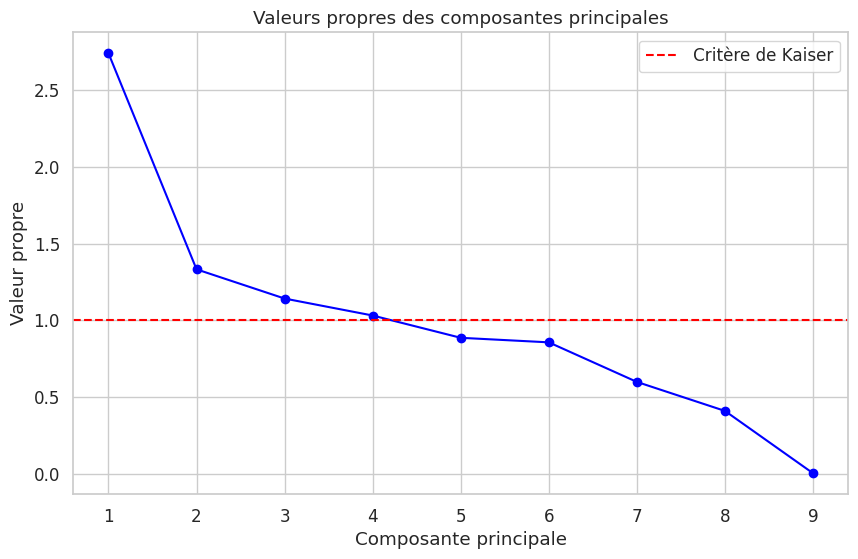

In [151]:
# Valeurs propres (variance expliquée par chaque composante)
eigenvalues = pca.explained_variance_

# Trace du scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', color='b')
plt.axhline(y=1, color='r', linestyle='--', label='Critère de Kaiser')
plt.title("Valeurs propres des composantes principales")
plt.xlabel("Composante principale")
plt.ylabel("Valeur propre")
plt.legend()
plt.grid(True)
plt.show()

Critère de Kaiser : on garde les composantes avec valeur propre > 1.

Méthode du coude (Elbow) : on choisit le point où la courbe « casse » (on peut prendre 4)

**Projection des données sur les deux premières composantes principales**

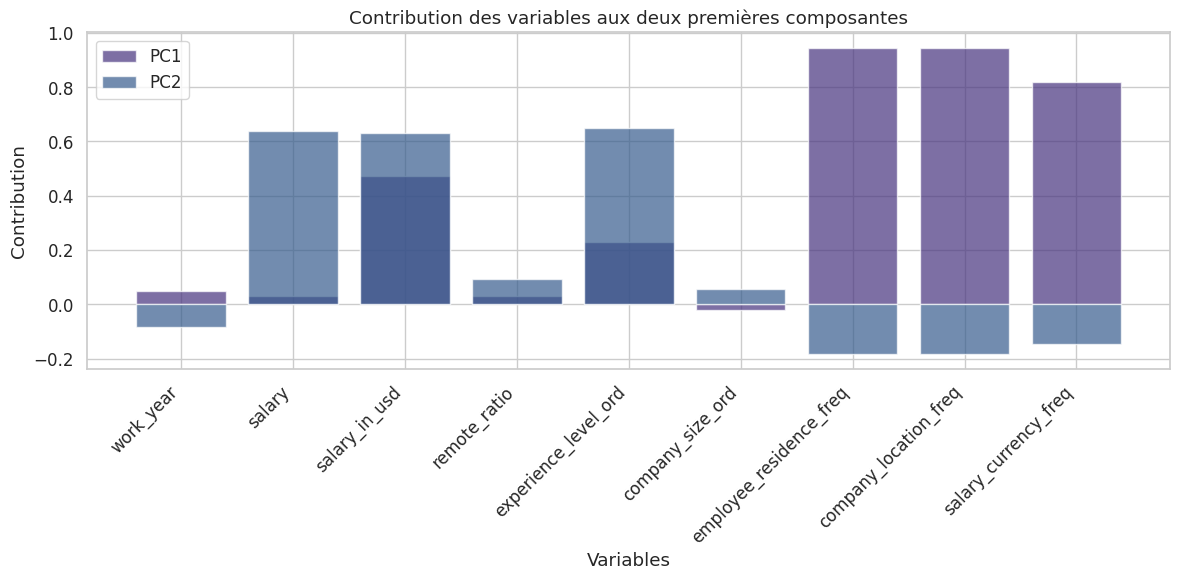

In [152]:
# Calcul des contributions des variables aux composantes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Récupérer les noms des variables
variable_names = X_acp.columns

# Création du graphique
plt.figure(figsize=(12, 6))

# Affichage des contributions pour les deux premières composantes principales
plt.bar(variable_names, loadings[:, 0], alpha=0.7, label='PC1')
plt.bar(variable_names, loadings[:, 1], alpha=0.7, label='PC2')

# Paramétrage des axes et du titre
plt.xlabel('Variables')
plt.ylabel('Contribution')
plt.title('Contribution des variables aux deux premières composantes')
plt.xticks(rotation=45, ha='right')  # Rotation des noms des variables pour une meilleure lisibilité
plt.legend()
plt.tight_layout()  # Ajustement de la mise en page pour éviter le chevauchement
plt.show()

**Cercle de corrélation**

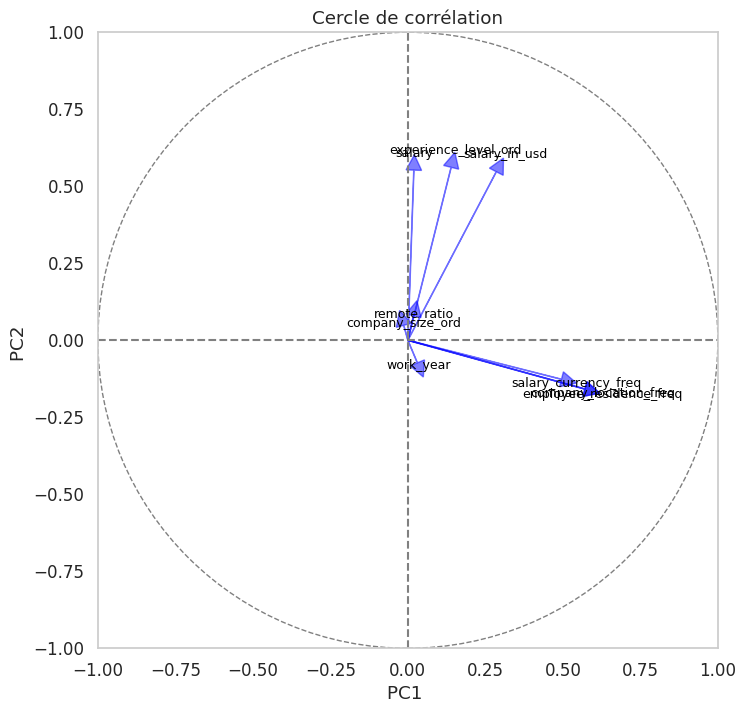

In [153]:

# Calcul de la matrice de corrélation entre les variables et les composantes principales
# Assurez-vous que 'pca' est l'objet PCA que vous avez déjà ajusté aux données d'origine
pcs = pca.components_

# Nombre de variables
n_vars = pcs.shape[1]
# Coordonnées des variables dans le plan formé par PC1 et PC2
x_vector = pcs[0, :]
y_vector = pcs[1, :]

# Cercle de corrélation
plt.figure(figsize=(8, 8))
plt.Circle((0, 0), 1, color='gray', fill=False)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

# Tracé des flèches pour chaque variable et affichage du nom de chaque variable
for i in range(n_vars):
    plt.arrow(0, 0, x_vector[i], y_vector[i], color='b', alpha=0.5,
              head_width=0.05, head_length=0.05)
    plt.text(x_vector[i] * 1.1, y_vector[i] * 1.1, X_acp.columns[i], color='black',
             ha='center', va='center', fontsize=9)

# Paramètres du cercle de corrélation
plt.gca().add_artist(plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--'))
plt.xlabel('PC1 ')
plt.ylabel('PC2 ')
plt.title("Cercle de corrélation")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()

plt.show()

# Splitting the data

In [154]:
x=df.drop(columns=['experience_level','salary', 'salary_currency', 'employee_residence','company_location','company_size','job_title'])

In [155]:
# Split he data into train and test df
X_train, X_test, y_train, y_test = train_test_split(x, target, random_state=42, test_size=0.2)

In [156]:
#shape of our data
print ('Train df:', X_train.shape,  y_train.shape)
print ('Test df:', X_test.shape,  y_test.shape)

Train df: (57530, 9) (57530,)
Test df: (14383, 9) (14383,)


# DBScan


In [157]:
df.describe()


,work_year,salary,remote_ratio,experience_level_ord,company_size_ord,employee_residence_freq,company_location_freq,salary_currency_freq
count,71913.000000,7.191300e+04,71913.000000,71913.000000,71913.000000,71913.000000,71913.000000,71913.000000
mean,2024.425153,1.617102e+05,24.569271,1.492387,1.019093,0.703881,0.705333,0.842510
std,0.721198,2.872868e+05,42.917779,0.742130,0.157187,0.296901,0.296499,0.245274
min,2020.000000,1.400000e+04,0.000000,0.000000,0.000000,0.000014,0.000014,0.000014
25%,2024.000000,9.640000e+04,0.000000,1.000000,1.000000,0.835523,0.836386,0.916524
50%,2025.000000,1.397000e+05,0.000000,2.000000,1.000000,0.835523,0.836386,0.916524
75%,2025.000000,1.922000e+05,0.000000,2.000000,1.000000,0.835523,0.836386,0.916524
max,2025.000000,3.040000e+07,100.000000,3.000000,2.000000,0.835523,0.836386,0.916524


In [158]:
df['salary_in_usd']=target

In [159]:
df=df.drop(columns=['salary','job_title','company_location','company_size','company_location','employee_residence','salary_currency','experience_level'])

In [160]:
df.dtypes

,0
work_year,int64
employment_type,object
remote_ratio,int64
job_title_grouped,object
experience_level_ord,int64
company_size_ord,int64
employee_residence_freq,float64
company_location_freq,float64
salary_currency_freq,float64
salary_in_usd,int64


In [161]:
for c in df.columns:
  print(c,df[c].unique())

to_encode=['employment_type','job_title_grouped']


work_year [2025 2024 2023 2022 2020 2021]
employment_type ['FT' 'PT' 'CT' 'FL']
remote_ratio [  0 100  50]
job_title_grouped ['Other' 'Data Scientist' 'Engineer' 'AI Engineer'
 'Business Intelligence Engineer' 'Manager' 'Product Manager'
 'Data Engineer' 'Machine Learning Engineer' 'Software Engineer'
 'Data Analyst' 'Research Scientist' 'Developer' 'Associate' 'Analyst'
 'Analytics Engineer' 'Systems Engineer' 'Director' 'Consultant'
 'Solutions Architect' 'Data Manager' 'Applied Scientist' 'Data Architect'
 'Data Specialist' 'Business Intelligence Analyst' 'Architect'
 'Engineering Manager' 'Platform Engineer' 'Research Engineer'
 'Software Developer' 'Software Development Engineer']
experience_level_ord [3 2 1 0]
company_size_ord [1 2 0]
employee_residence_freq [8.35523480e-01 6.35490106e-02 5.53446526e-03 4.25514163e-03
 3.92974845e-02 5.42321972e-03 3.18440338e-03 1.73821145e-03
 7.03627995e-03 4.33857578e-03 2.64208140e-04 1.83555129e-03
 2.36396757e-04 3.05925215e-04 7.92624421e

In [162]:
df.to_csv('processed_salaries.csv', index=False)
print("DataFrame saved to 'processed_salaries.csv'")

DataFrame saved to 'processed_salaries.csv'


In [163]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in to_encode:
  df[col] = le.fit_transform(df[col])

df.dtypes

,0
work_year,int64
employment_type,int64
remote_ratio,int64
job_title_grouped,int64
experience_level_ord,int64
company_size_ord,int64
employee_residence_freq,float64
company_location_freq,float64
salary_currency_freq,float64
salary_in_usd,int64


# Task
Prepare the feature data for KNN by selecting all processed columns from `df`, excluding `salary_in_usd`, and then scale these features using `StandardScaler`. Next, initialize `NearestNeighbors` with `n_neighbors=3` and fit it to the scaled feature data. Finally, select a sample data point and find its 3 nearest neighbors, summarizing their distances and original indices.

## Prepare Data for KNN

### Subtask:
Select all processed columns from the current `df`, excluding the target `salary_in_usd`, to be used as features for KNN. Scale these selected features using `StandardScaler`.


**Reasoning**:
The subtask requires selecting all processed columns from the current `df` excluding the target `salary_in_usd` and then scaling these selected features using `StandardScaler`. I will first create a new DataFrame `features_for_knn` by dropping the target column, and then initialize and apply `StandardScaler` to this new DataFrame to get `scaled_features`.



In [164]:
from sklearn.preprocessing import StandardScaler

# Create a new DataFrame by dropping the 'salary_in_usd' column
features_for_knn = df.drop(columns=['salary_in_usd'])

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to features_for_knn and transform the data
scaled_features = scaler.fit_transform(features_for_knn)

print("Shape of features_for_knn:", features_for_knn.shape)
print("Shape of scaled_features:", scaled_features.shape)
print("First 5 rows of scaled_features:\n", scaled_features[:5])

Shape of features_for_knn: (71913, 9)
Shape of scaled_features: (71913, 9)
First 5 rows of scaled_features:
 [[ 0.79707799  0.03690682 -0.57247702  0.70131828  2.0314809  -0.12146447
   0.44339314  0.44200342  0.30176381]
 [ 0.79707799  0.03690682 -0.57247702  0.70131828  2.0314809  -0.12146447
   0.44339314  0.44200342  0.30176381]
 [ 0.79707799  0.03690682 -0.57247702 -0.3744988   0.68399955 -0.12146447
   0.44339314  0.44200342  0.30176381]
 [ 0.79707799  0.03690682 -0.57247702 -0.3744988   0.68399955 -0.12146447
   0.44339314  0.44200342  0.30176381]
 [ 0.79707799  0.03690682  1.75757589  0.16340974 -0.66348181 -0.12146447
   0.44339314  0.44200342  0.30176381]]


**Reasoning**:
The previous step successfully scaled the features. Now, I need to initialize the NearestNeighbors model with `n_neighbors=3` and fit it to the `scaled_features` to prepare for finding the nearest neighbors.



In [165]:
from sklearn.neighbors import NearestNeighbors

# Initialize NearestNeighbors with n_neighbors=3
knn_model = NearestNeighbors(n_neighbors=3)

# Fit the model to the scaled features
knn_model.fit(scaled_features)

print("NearestNeighbors model initialized and fitted successfully.")

NearestNeighbors model initialized and fitted successfully.


**Reasoning**:
I need to select a sample data point from the scaled features and use the fitted `knn_model` to find its 3 nearest neighbors, then display their distances and original indices as per the subtask requirement.



In [166]:
import numpy as np

# Select a sample data point (e.g., the first data point from scaled_features)
sample_data_point = scaled_features[876].reshape(1, -1)

#
#
#

# Find the 3 nearest neighbors to the sample data point
distances, indices = knn_model.kneighbors(sample_data_point)

print("Distances to 3 nearest neighbors:", distances)
print("Indices of 3 nearest neighbors:", indices)

Distances to 3 nearest neighbors: [[0. 0. 0.]]
Indices of 3 nearest neighbors: [[3920  875  876]]


In [167]:
# Initialize NearestNeighbors with n_neighbors=3 and metric='cosine'
knn_cosine_model = NearestNeighbors(n_neighbors=3, metric='cosine')

# Fit the model to the scaled features
knn_cosine_model.fit(scaled_features)

print("NearestNeighbors model initialized with cosine similarity and fitted successfully.")

# Select the same sample data point as before (e.g., index 876 from scaled_features)
sample_data_point_cosine = scaled_features[876].reshape(1, -1)

# Find the 3 nearest neighbors to the sample data point using cosine similarity
cosine_distances, cosine_indices = knn_cosine_model.kneighbors(sample_data_point_cosine)

print("\nDistances to 3 nearest neighbors (cosine similarity):", cosine_distances)
print("Indices of 3 nearest neighbors (cosine similarity):", cosine_indices)

NearestNeighbors model initialized with cosine similarity and fitted successfully.

Distances to 3 nearest neighbors (cosine similarity): [[1.11022302e-16 1.11022302e-16 1.11022302e-16]]
Indices of 3 nearest neighbors (cosine similarity): [[35310 37328 37327]]


In [168]:
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Re-initialize and fit the StandardScaler (assuming features_for_knn and df are still available)
# Note: This step re-executes the scaling process to ensure 'scaler' is defined if the kernel state reset.
features_for_knn = df.drop(columns=['salary_in_usd'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_knn)

# Re-initialize and fit the NearestNeighbors model (assuming scaled_features is available)
# Note: This step re-executes the KNN model fitting to ensure 'knn_model' is defined.
knn_model = NearestNeighbors(n_neighbors=3)
knn_model.fit(scaled_features)

# Initialize NearestNeighbors with n_neighbors=3 and metric='cosine'
knn_cosine_model = NearestNeighbors(n_neighbors=3, metric='cosine')
# Fit the model to the scaled features
knn_cosine_model.fit(scaled_features)

# Save the StandardScaler
joblib.dump(scaler, 'scaler.pkl')

# Save the NearestNeighbors models
joblib.dump(knn_model, 'knn_model.pkl')
joblib.dump(knn_cosine_model, 'knn_cosine_model.pkl')

print("Models saved successfully as 'scaler.pkl', 'knn_model.pkl', and 'knn_cosine_model.pkl'")

Models saved successfully as 'scaler.pkl', 'knn_model.pkl', and 'knn_cosine_model.pkl'


Once saved, you can load these models in your Flask application. For example, in your Flask app, you would do something like this:

```python
import joblib
from flask import Flask, request, jsonify
import numpy as np

app = Flask(__name__)

# Load the scaler and KNN model
scaler = joblib.load('scaler.pkl')
knn_model = joblib.load('knn_model.pkl')

@app.route('/find_neighbors', methods=['POST'])
def find_neighbors():
    data = request.json # Assuming input data is sent as JSON
    # Preprocess the input data using the loaded scaler
    input_features = np.array(data['features']).reshape(1, -1)
    scaled_input = scaler.transform(input_features)

    # Find nearest neighbors
    distances, indices = knn_model.kneighbors(scaled_input)

    return jsonify({"distances": distances.tolist(), "indices": indices.tolist()})

if __name__ == '__main__':
    app.run(debug=True)
```

This is a conceptual example; you would need to adapt the input features and their order to match what your `knn_model` expects after preprocessing.